# Machine Learning

# Ice Cream Selling dataset

# Problem statement:-
The Ice Cream Selling dataset aims to predict ice cream sales based on temperature. It explores how changes in temperature impact consumer demand for ice cream. The challenge is to model this non-linear relationship using machine learning, particularly polynomial regression. 

In [71]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [72]:
df = pd.read_csv("B:\\7th sem\\Bootcamp\\ML\\Ice_cream selling data.csv")

In [73]:
df.head()

,Temperature (°C),Ice Cream Sales (units)
0,-4.662263,41.842986
1,-4.316559,34.661120
2,-4.213985,39.383001
3,-3.949661,37.539845
4,-3.578554,32.284531


In [74]:
df.shape

(49, 2)

In [75]:
df.tail()

,Temperature (°C),Ice Cream Sales (units)
44,3.610778,28.912188
45,3.704057,17.843957
46,4.130868,34.530743
47,4.133534,27.698383
48,4.899032,41.514822


In [76]:
df.columns

Index(['Temperature (°C)', 'Ice Cream Sales (units)'], dtype='object')

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (°C)         49 non-null     float64
 1   Ice Cream Sales (units)  49 non-null     float64
dtypes: float64(2)
memory usage: 912.0 bytes


In [78]:
df.isnull().sum()

Temperature (°C)           0
Ice Cream Sales (units)    0
dtype: int64

In [79]:
df.describe()

,Temperature (°C),Ice Cream Sales (units)
count,49.000000,49.000000
mean,0.271755,15.905308
std,2.697672,12.264682
min,-4.662263,0.328626
25%,-2.111870,4.857988
50%,0.688781,12.615181
75%,2.784836,25.142082
max,4.899032,41.842986


<AxesSubplot:>

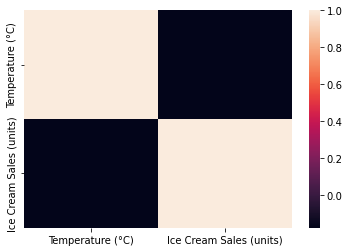

In [80]:
sns.heatmap(df.corr())

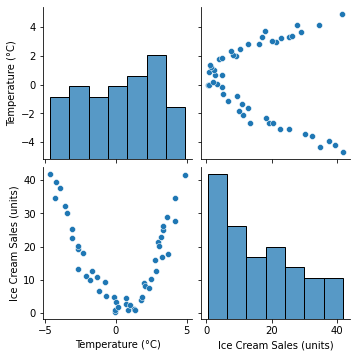

In [81]:
sns.pairplot(df)

In [82]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [83]:
x = x.reshape(-1, 1)


In [102]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=20)

In [161]:
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [163]:
reg = PolynomialFeatures(degree=4)
X_train = reg.fit_transform(X_train)
X_test = reg.transform(X_test)


In [164]:
logmodel = LinearRegression()
logmodel.fit(X_train, y_train)


LinearRegression()

In [165]:
y_train_pred = logmodel.predict(X_train)
y_test_pred = logmodel.predict(X_test)

In [166]:
train_score = logmodel.score(X_train, y_train)


In [167]:
print(f"Training R^2 Score: {train_score}")

Training R^2 Score: 0.9323237778206221


In [168]:
test_score = logmodel.score(X_test, y_test)


In [169]:
print(f"Testing R^2 Score: {test_score}")


Testing R^2 Score: 0.9702708883672486


Text(0, 0.5, 'Ice Cream Sales(units)')

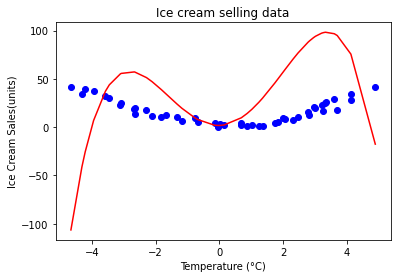

In [160]:
plt.scatter(x,y,color='blue')
plt.plot(x,logmodel.predict(poly_reg.fit_transform(x)),color='red')
plt.title('Ice cream selling data')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales(units)')